In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/NewspaperData.csv")

In [3]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [5]:
df.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


<AxesSubplot:>

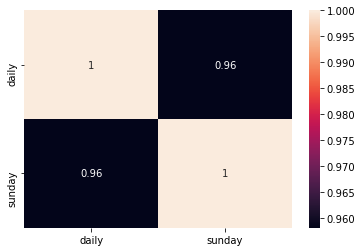

In [8]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr ,annot=True)

C:\Users\Ruchita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

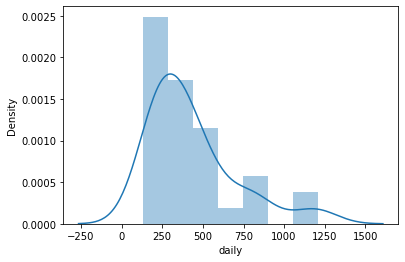

In [9]:
sns.distplot(df['daily'])

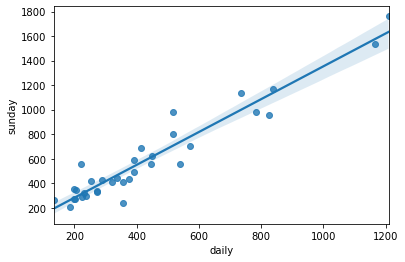

In [10]:
sns.regplot(x="daily",y="sunday", data=df);

In [11]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily" , data=df).fit()

In [12]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [13]:
print(model.tvalues)

Intercept     0.386427
daily        18.934840
dtype: float64


In [14]:
(model.rsquared , model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [15]:
newdf=pd.Series([200,300])

In [16]:
df_pred=pd.DataFrame(newdf , columns=['daily'])

In [17]:
df_pred

,daily
0,200
1,300


In [18]:
model.predict(df_pred)

0    281.778581
1    415.750057
dtype: float64